In [1]:
# 날씨 데이터 읽어서 행별 리스트로 구성 1
with open('data-files/seoul-temperature.csv', 'rt', encoding='utf-8') as f:
    lines = f.readlines()

# print(lines)
# print( lines[0] )
# print( lines[:10] )

# print( lines[1] )
# row = lines[1].split(",") # "1, 2, 3" -> ['1', '2', '3']
# print(row)
# print( row[0].replace('\t', '') ) # '\t123' -> '123'
# print( float(row[2]), float(row[3]) ) # '1.2' -> 1.2
# print( float( row[4].replace('\n', '') ) ) # '1.2\t' -> 1.2

rows = []
for line in lines[1:]:
    row = line.split(',')
    # print(row)
    if len(row) == 5 and \
       row[2] and row[3] and row[4].replace('\n', ''): # 빈문자열은 False로 해석
        row2 = [ row[0].replace('\t', ''),
                float(row[2]), float(row[3]),
                float( row[4].replace('\n', '') ) ]
        rows.append(row2)



In [2]:
print( len(rows) ) # len : 데이터 갯수

print( rows[:5] )

41695
[['1907-10-01', 13.5, 7.9, 20.7], ['1907-10-02', 16.2, 7.9, 22.0], ['1907-10-03', 16.2, 13.1, 21.3], ['1907-10-04', 16.5, 11.2, 22.0], ['1907-10-05', 17.6, 10.9, 25.4]]


In [3]:
# 서울이 가장 더웠던 날의 데이터 조회
high = -1000
high_row = None
for row in rows:
    # row[-1] # 어떤 날의 최고기온
    if high < row[-1]:
        high = row[-1]
        high_row = row

print(high_row)

['2018-08-01', 33.6, 27.8, 39.6]


In [4]:
# 서울이 가장 추웠던 날의 데이터 조회
low_row = None
for row in rows:
    # row[-2] # 어떤 날의 최저기온
    if low_row is None or low_row[-2] > row[-2]:        
        low_row = row

print(low_row)

['1927-12-31', -15.3, -23.1, -6.4]


In [5]:
# 관측 기간 전체 평균기온의 평균
total = 0
cnt = 0
for row in rows:
    if row[1]:
        total += row[1] # total = total + row[1]
        cnt += 1

print( total / cnt )

11.829865384615358


In [7]:
import matplotlib.pyplot as plt

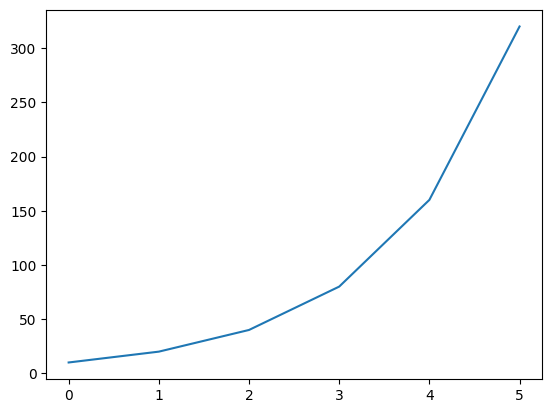

In [9]:
plt.plot([10, 20, 40, 80, 160, 320])
plt.show()

In [13]:
# 평균 기온만 뽑아서 리스트 만들기
print( rows[1] )
print( rows[2] )
print( rows[3] )
avg_temp_list = []
for i in range(len(rows)):
    avg_temp_list.append( rows[i][1] )

avg_temp_list2 = []
for row in rows:
    avg_temp_list2.append( row[1] )

['1907-10-02', 16.2, 7.9, 22.0]
['1907-10-03', 16.2, 13.1, 21.3]
['1907-10-04', 16.5, 11.2, 22.0]


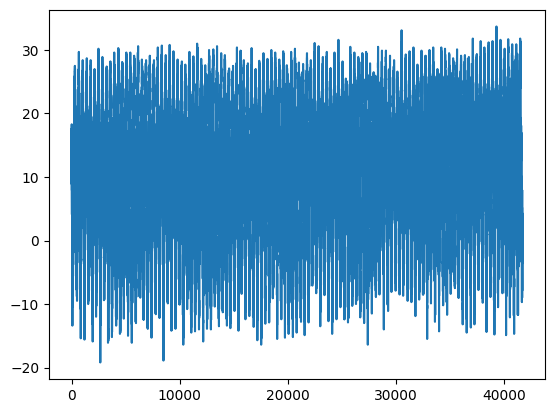

In [15]:
plt.plot(avg_temp_list2)
plt.show()

In [41]:
# 매년 3월 5일의 평균기온을 뽑아서 리스트에 저장
print( rows[152] )
avg_temp_list3 = []
date_list3 = []
for row in rows:
    if row[0][-5:] == '08-15':
    # if '-03-05' in row[0]:
        avg_temp_list3.append( row[1] )
        date_list3.append( row[0][:4] ) # 년도만 뽑아서 리스트에 추가

['1908-03-01', 0.7, -4.8, 4.0]


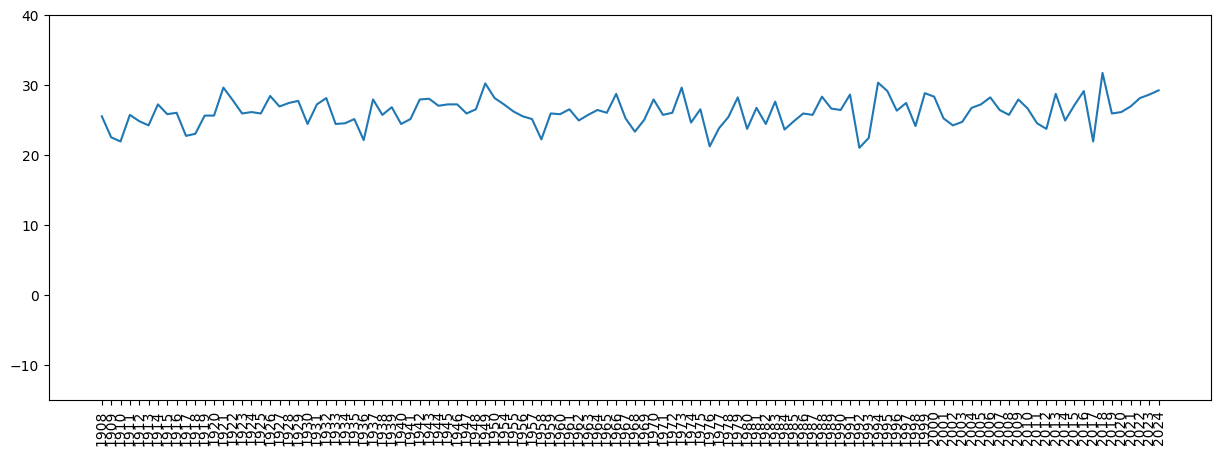

In [42]:
plt.figure(figsize=(15, 5)) # 그래프의 표시 영역 크기 설정
# plt.plot(avg_temp_list3)
plt.plot(date_list3, avg_temp_list3)
plt.ylim(-15, 40)
plt.xticks(rotation=90)
plt.show()